## Time Series Forecasting_Bidirectional LSTM

In [1]:
# 驗證函數

from numpy import array
 
# Split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence) - 1:
            break
            # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [2]:
# 驗證

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90


In [5]:
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()
predict_days = 6
df = pdr.get_data_yahoo('2330.tw', start = '1999-01-01', end = '2023-04-20')
data = df.reset_index()
data['TickerId']   = '2330'
data['TickerName'] = '台積電'
data[-9:]

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume,TickerId,TickerName
5800,2023-04-07,535.0,535.0,529.0,531.0,531.0,8557482,2330,台積電
5801,2023-04-10,533.0,533.0,528.0,529.0,529.0,7435151,2330,台積電
5802,2023-04-11,522.0,527.0,522.0,524.0,524.0,22675697,2330,台積電
5803,2023-04-12,523.0,524.0,517.0,520.0,520.0,23816473,2330,台積電
5804,2023-04-13,515.0,517.0,510.0,510.0,510.0,25536889,2330,台積電
5805,2023-04-14,516.0,520.0,513.0,516.0,516.0,18072504,2330,台積電
5806,2023-04-17,519.0,520.0,514.0,520.0,520.0,14634287,2330,台積電
5807,2023-04-18,518.0,520.0,514.0,515.0,515.0,15168888,2330,台積電
5808,2023-04-19,517.0,518.0,509.0,510.0,510.0,21123233,2330,台積電


In [6]:
# 使用TSMC股價驗證

# define input sequence
raw_seq = data.Close # [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 6
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
# for i in range(len(X)):
#   print(X[i], y[i])

In [7]:
X[-4:], y[-4:]

(array([[530., 531., 529., 524., 520., 510.],
        [531., 529., 524., 520., 510., 516.],
        [529., 524., 520., 510., 516., 520.],
        [524., 520., 510., 516., 520., 515.]]),
 array([516., 520., 515., 510.]))

In [9]:
# 使用LSTM看前看後記憶

from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, SimpleRNN, GRU, Bidirectional

n_steps = 6
n_features = 1
model = Sequential()
model.add(Bidirectional(LSTM(50, activation = 'relu', input_shape = (n_steps, n_features))))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')
# model.summary()

In [10]:
# 多出一個維度
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [11]:
X.shape

(5803, 6, 1)

In [12]:
# fit model
history = model.fit(X, y, epochs = 50, verbose = 2)

Epoch 1/50
182/182 - 5s - loss: 4063.5295 - 5s/epoch - 28ms/step
Epoch 2/50
182/182 - 1s - loss: 28.5097 - 1s/epoch - 7ms/step
Epoch 3/50
182/182 - 1s - loss: 31.9525 - 1s/epoch - 8ms/step
Epoch 4/50
182/182 - 1s - loss: 32.9533 - 1s/epoch - 8ms/step
Epoch 5/50
182/182 - 1s - loss: 30.4344 - 1s/epoch - 7ms/step
Epoch 6/50
182/182 - 1s - loss: 30.5127 - 1s/epoch - 7ms/step
Epoch 7/50
182/182 - 1s - loss: 27.4219 - 1s/epoch - 7ms/step
Epoch 8/50
182/182 - 1s - loss: 31.5265 - 1s/epoch - 7ms/step
Epoch 9/50
182/182 - 1s - loss: 27.7487 - 1s/epoch - 7ms/step
Epoch 10/50
182/182 - 1s - loss: 30.7745 - 1s/epoch - 8ms/step
Epoch 11/50
182/182 - 1s - loss: 27.4181 - 1s/epoch - 8ms/step
Epoch 12/50
182/182 - 1s - loss: 27.7202 - 1s/epoch - 7ms/step
Epoch 13/50
182/182 - 1s - loss: 26.7150 - 879ms/epoch - 5ms/step
Epoch 14/50
182/182 - 1s - loss: 30.4504 - 872ms/epoch - 5ms/step
Epoch 15/50
182/182 - 1s - loss: 26.7762 - 1s/epoch - 7ms/step
Epoch 16/50
182/182 - 1s - loss: 30.6825 - 1s/epoch - 7

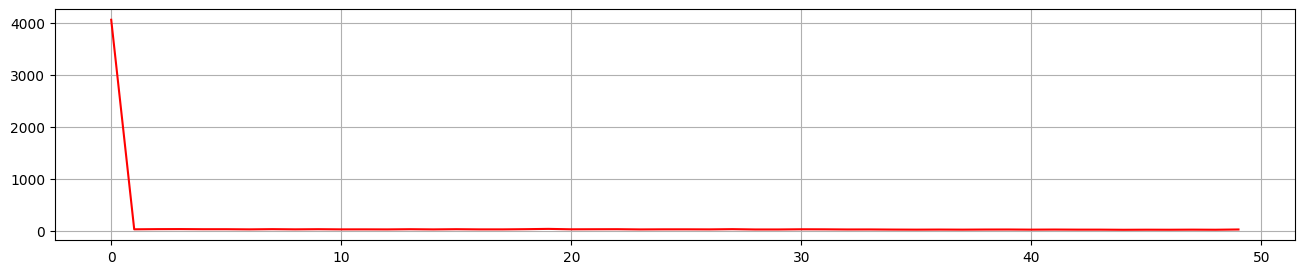

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (16, 3))
plt.grid()
plt.plot(history.history.get('loss'), color = 'red')
plt.show()

In [14]:
# Deep Learning進行預測
# 重要數據
pre_Close = model.predict(X).ravel()
Close = y
sum((pre_Close - Close) ** 2) / len(Close)

21.407785449822285

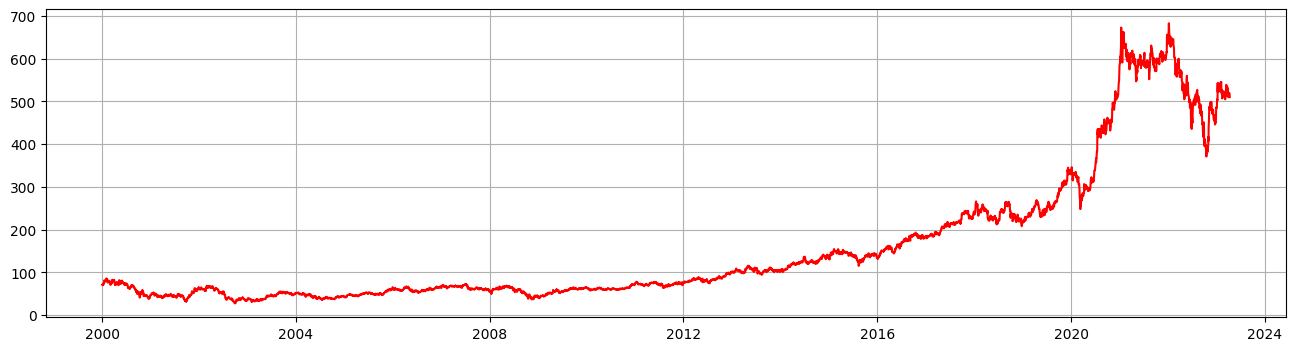

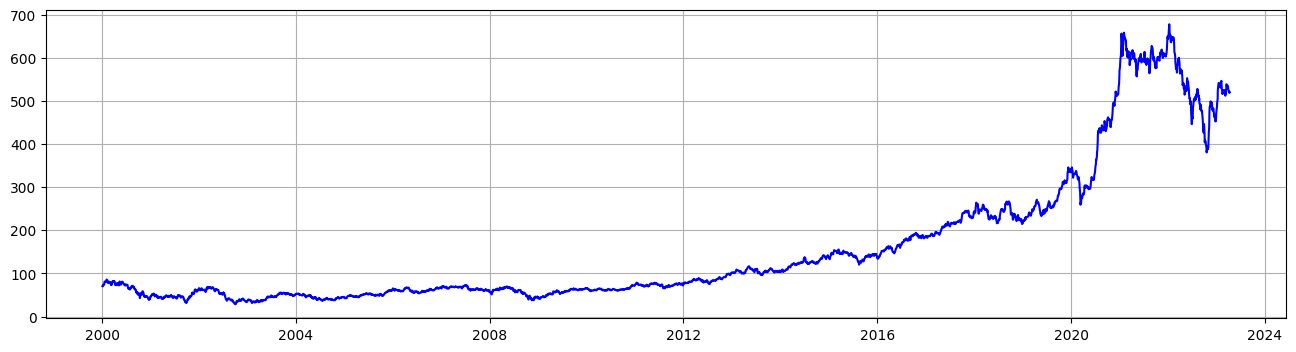

In [15]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

data_plot = data[:len(pre_Close)]

plt.figure(figsize = (16, 4))
plt.grid()
plt.plot(pd.to_datetime(data_plot.Date), Close, color = 'red')
plt.show()

plt.figure(figsize = (16, 4))
plt.grid()
plt.plot(pd.to_datetime(data_plot.Date), pre_Close, color = 'blue')
plt.show()

In [16]:
X.shape
model.predict(X[-1].reshape(1, X[-1].shape[0], X[-1].shape[1]))

array([[520.31274]], dtype=float32)

In [17]:
# 針對最近數據預測（Deep Learning）
# 預測下個十天TSMC股價

import numpy as np
from datetime import timedelta

future_days, future_price = [], []

# 下一天
next_data = X[-1]
next_day = model.predict(X[-1].reshape(1, X[-1].shape[0], X[-1].shape[1]))
print(next_day[0], data.Date[-1:].dt.strftime('%Y-%m-%d').values[0])

# 剩下的天數再預測
for i in range(1, 90, 1):
    next_data = np.vstack((next_data , next_day[0]))[-1 * predict_days:, :]
    next_day = model.predict(next_data.reshape(1, next_data.shape[0], next_data.shape[1]))
    print(next_day[0],  (data.Date[-1:] + timedelta(days = i)).dt.strftime('%Y-%m-%d').values[0])
    future_days.append((data.Date[-1:] + timedelta(days = i)).dt.strftime('%Y-%m-%d').values[0])
    future_price.append(next_day[0][0])

[520.31274] 2023-04-19
[521.68536] 2023-04-20
[523.92755] 2023-04-21
[525.83295] 2023-04-22
[527.7556] 2023-04-23
[529.7313] 2023-04-24
[531.734] 2023-04-25
[533.7207] 2023-04-26
[535.7126] 2023-04-27
[537.7046] 2023-04-28
[539.7012] 2023-04-29
[541.7012] 2023-04-30
[543.7043] 2023-05-01
[545.7105] 2023-05-02
[547.71967] 2023-05-03
[549.7322] 2023-05-04
[551.748] 2023-05-05
[553.767] 2023-05-06
[555.7894] 2023-05-07
[557.8151] 2023-05-08
[559.8443] 2023-05-09
[561.8768] 2023-05-10
[563.91284] 2023-05-11
[565.95215] 2023-05-12
[567.9951] 2023-05-13
[570.0415] 2023-05-14
[572.09155] 2023-05-15
[574.14514] 2023-05-16
[576.2025] 2023-05-17
[578.26324] 2023-05-18
[580.3278] 2023-05-19
[582.3962] 2023-05-20
[584.4682] 2023-05-21
[586.54395] 2023-05-22
[588.62354] 2023-05-23
[590.70703] 2023-05-24
[592.7943] 2023-05-25
[594.88556] 2023-05-26
[596.9807] 2023-05-27
[599.07983] 2023-05-28
[601.183] 2023-05-29
[603.29016] 2023-05-30
[605.4015] 2023-05-31
[607.51685] 2023-06-01
[609.6363] 2023-06-

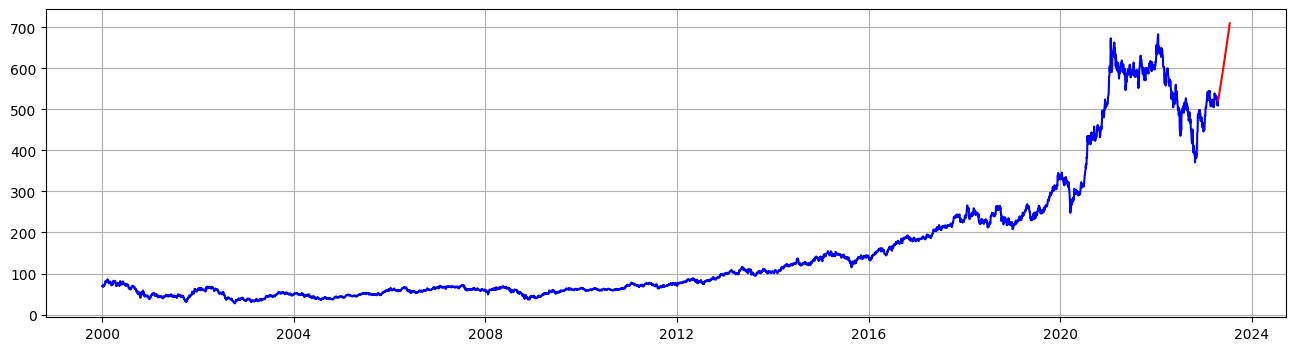

In [18]:
# predict next N days
# draw plot

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize = (16, 4))
plt.grid()
plt.plot(pd.to_datetime(data.Date)[:], data.Close[:], color = 'blue')
plt.plot(pd.to_datetime(future_days), future_price, color = 'red')

plt.show()

## Time Series Forecasting_Vanilla LSTM

In [19]:
# 驗證函數

from numpy import array

# Split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence) - 1:
            break
            # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [20]:
# 驗證

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90


In [21]:
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()
predict_days = 6
df = pdr.get_data_yahoo('2330.tw', start = '1999-01-01', end = '2023-04-20')
data = df.reset_index()
data['TickerId']   = '2330'
data['TickerName'] = '台積電'
data[-9:]

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume,TickerId,TickerName
5800,2023-04-07,535.0,535.0,529.0,531.0,531.0,8557482,2330,台積電
5801,2023-04-10,533.0,533.0,528.0,529.0,529.0,7435151,2330,台積電
5802,2023-04-11,522.0,527.0,522.0,524.0,524.0,22675697,2330,台積電
5803,2023-04-12,523.0,524.0,517.0,520.0,520.0,23816473,2330,台積電
5804,2023-04-13,515.0,517.0,510.0,510.0,510.0,25536889,2330,台積電
5805,2023-04-14,516.0,520.0,513.0,516.0,516.0,18072504,2330,台積電
5806,2023-04-17,519.0,520.0,514.0,520.0,520.0,14634287,2330,台積電
5807,2023-04-18,518.0,520.0,514.0,515.0,515.0,15168888,2330,台積電
5808,2023-04-19,517.0,518.0,509.0,510.0,510.0,21123233,2330,台積電


In [22]:
# 使用TSMC股價驗證

# define input sequence
raw_seq = data.Close # [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 6
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
# for i in range(len(X)):
#   print(X[i], y[i])

In [23]:
X[-4:], y[-4:]

(array([[530., 531., 529., 524., 520., 510.],
        [531., 529., 524., 520., 510., 516.],
        [529., 524., 520., 510., 516., 520.],
        [524., 520., 510., 516., 520., 515.]]),
 array([516., 520., 515., 510.]))

In [24]:
# 使用LSTM看前後記憶

from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, SimpleRNN, GRU, Bidirectional

n_steps = 6
n_features = 1
model = Sequential()
model.add(LSTM(50, activation = 'relu', input_shape = (n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50)                10400     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [25]:
# 多出一個維度
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [26]:
X.shape

(5803, 6, 1)

In [27]:
# fit model
history = model.fit(X, y, epochs = 50, verbose = 2)

Epoch 1/50
182/182 - 3s - loss: 1358.1936 - 3s/epoch - 16ms/step
Epoch 2/50
182/182 - 1s - loss: 30.7309 - 953ms/epoch - 5ms/step
Epoch 3/50
182/182 - 1s - loss: 31.0107 - 1s/epoch - 6ms/step
Epoch 4/50
182/182 - 1s - loss: 33.5962 - 1s/epoch - 7ms/step
Epoch 5/50
182/182 - 1s - loss: 32.7025 - 1s/epoch - 7ms/step
Epoch 6/50
182/182 - 1s - loss: 31.7377 - 1s/epoch - 7ms/step
Epoch 7/50
182/182 - 1s - loss: 33.9793 - 1s/epoch - 7ms/step
Epoch 8/50
182/182 - 1s - loss: 31.8458 - 1s/epoch - 7ms/step
Epoch 9/50
182/182 - 1s - loss: 31.2169 - 1s/epoch - 7ms/step
Epoch 10/50
182/182 - 1s - loss: 37.6823 - 1s/epoch - 7ms/step
Epoch 11/50
182/182 - 1s - loss: 38.2610 - 1s/epoch - 7ms/step
Epoch 12/50
182/182 - 1s - loss: 34.7152 - 1s/epoch - 7ms/step
Epoch 13/50
182/182 - 1s - loss: 30.2940 - 1s/epoch - 7ms/step
Epoch 14/50
182/182 - 1s - loss: 41.4405 - 1s/epoch - 7ms/step
Epoch 15/50
182/182 - 1s - loss: 35.7519 - 1s/epoch - 7ms/step
Epoch 16/50
182/182 - 1s - loss: 34.9096 - 1s/epoch - 7ms/

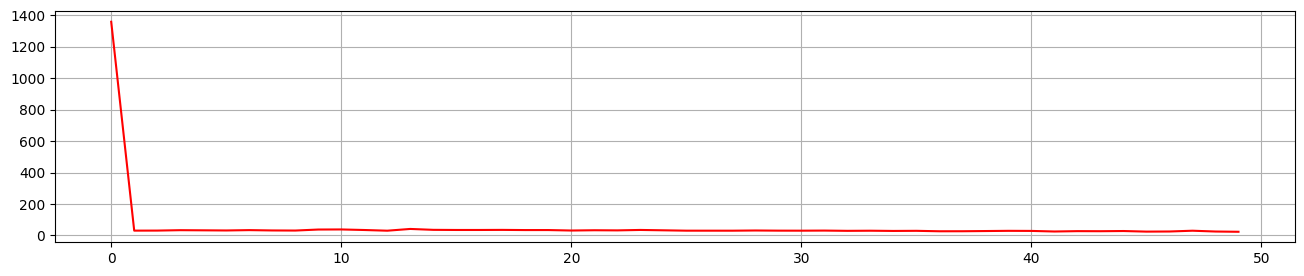

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (16, 3))
plt.grid()
plt.plot(history.history.get('loss') , color = 'red')
plt.show()

In [29]:
# Deep Learning進行預測
# 重要數據
pre_Close = model.predict(X).ravel()
Close = y
sum((pre_Close - Close) ** 2) / len(Close)

22.78728845819756

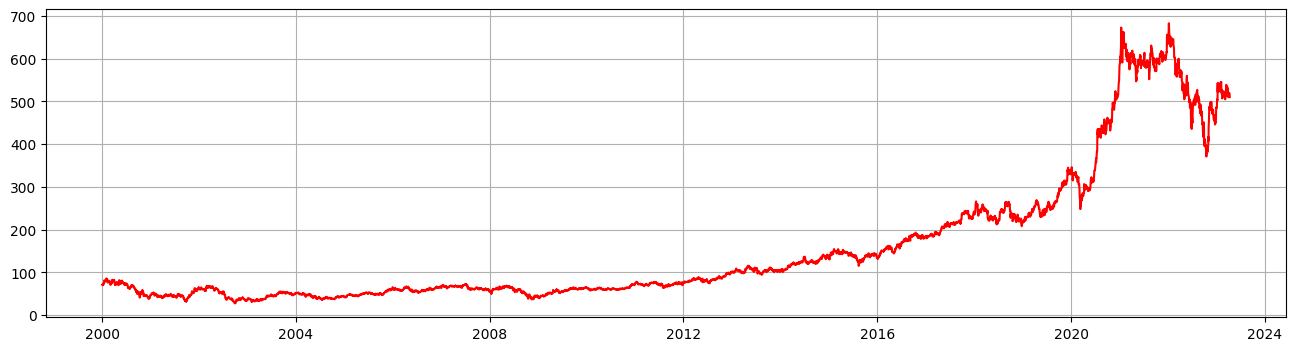

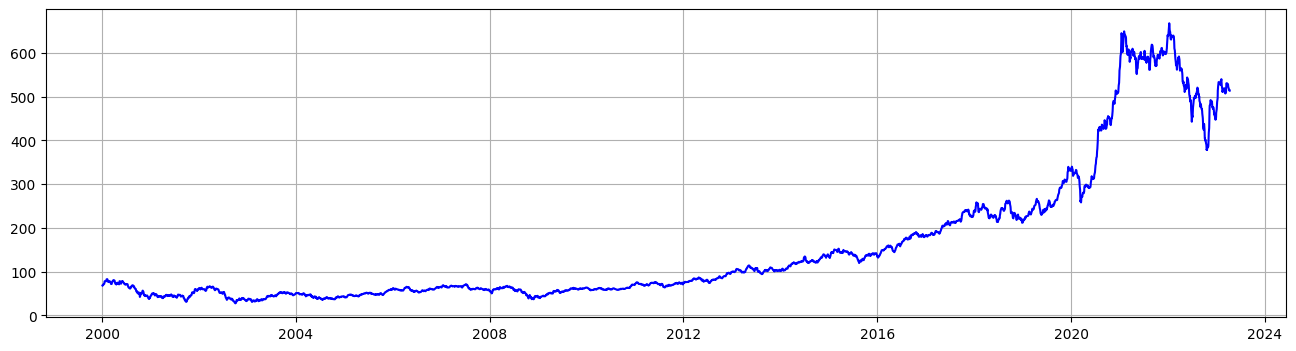

In [30]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

data_plot = data[:len(pre_Close)]

plt.figure(figsize = (16, 4))
plt.grid()
plt.plot(pd.to_datetime(data_plot.Date), Close, color = 'red')
plt.show()

plt.figure(figsize = (16, 4))
plt.grid()
plt.plot(pd.to_datetime(data_plot.Date), pre_Close, color = 'blue')
plt.show()

In [31]:
X.shape
model.predict(X[-1].reshape(1, X[-1].shape[0], X[-1].shape[1]))

array([[513.80927]], dtype=float32)

In [32]:
X[-1]

array([[524.],
       [520.],
       [510.],
       [516.],
       [520.],
       [515.]])

In [33]:
# 針對最近數據預測（Deep Learning）
# 預測下個十天TSMC股價

import numpy as np
from datetime import timedelta

future_days, future_price = [], []

# 下一天
next_data = X[-1]
next_day = model.predict(X[-1].reshape(1, X[-1].shape[0], X[-1].shape[1]))
print(next_day[0], data.Date[-1:].dt.strftime('%Y-%m-%d').values[0])

# 剩下的天數再預測
for i in range(1, 90, 1):
    next_data = np.vstack( (next_data , next_day[0]) )[-1 * predict_days:, :]
    next_day = model.predict(next_data.reshape(1, next_data.shape[0], next_data.shape[1]))
    print(next_day[0], (data.Date[-1:] + timedelta(days = i)).dt.strftime('%Y-%m-%d').values[0])
    future_days.append((data.Date[-1:] + timedelta(days = i)).dt.strftime('%Y-%m-%d').values[0])

[513.80927] 2023-04-19
[512.98145] 2023-04-20
[512.07684] 2023-04-21
[511.06348] 2023-04-22
[510.03317] 2023-04-23
[508.93768] 2023-04-24
[507.9127] 2023-04-25
[506.88855] 2023-04-26
[505.86093] 2023-04-27
[504.83157] 2023-04-28
[503.80624] 2023-04-29
[502.78317] 2023-04-30
[501.76334] 2023-05-01
[500.74545] 2023-05-02
[499.72992] 2023-05-03
[498.71664] 2023-05-04
[497.7058] 2023-05-05
[496.6973] 2023-05-06
[495.69113] 2023-05-07
[494.68732] 2023-05-08
[493.6858] 2023-05-09
[492.6866] 2023-05-10
[491.6898] 2023-05-11
[490.69528] 2023-05-12
[489.70303] 2023-05-13
[488.71317] 2023-05-14
[487.72556] 2023-05-15
[486.74026] 2023-05-16
[485.75723] 2023-05-17
[484.77655] 2023-05-18
[483.79813] 2023-05-19
[482.822] 2023-05-20
[481.8481] 2023-05-21
[480.87656] 2023-05-22
[479.90723] 2023-05-23
[478.94016] 2023-05-24
[477.97537] 2023-05-25
[477.01288] 2023-05-26
[476.05258] 2023-05-27
[475.09454] 2023-05-28
[474.1388] 2023-05-29
[473.18524] 2023-05-30
[472.23395] 2023-05-31
[471.28488] 2023-06-0

ValueError: x and y must have same first dimension, but have shapes (89,) and (0,)

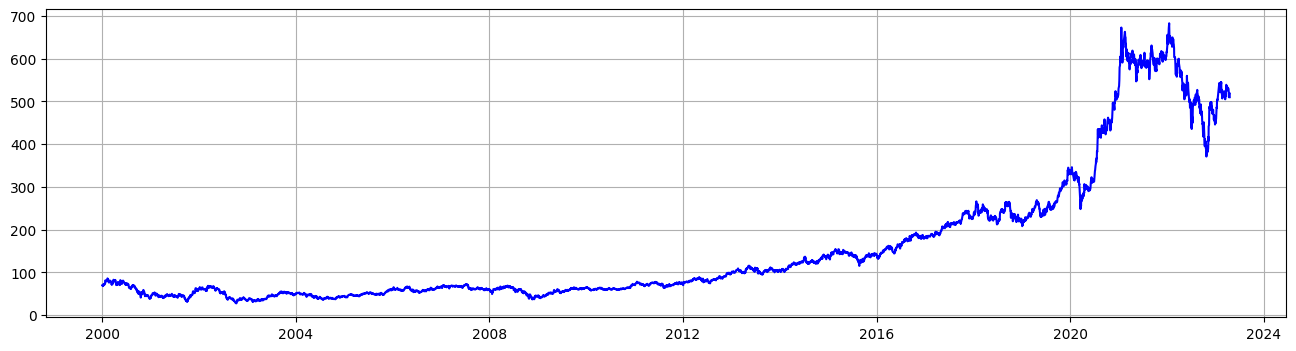

In [35]:
# predict next N days
# draw plot

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize = (16, 4))
plt.grid()
plt.plot(pd.to_datetime(data.Date)[:], data.Close[:], color = 'blue')
plt.plot(pd.to_datetime(future_days), future_price, color = 'red')

plt.show()

## Time Series Forecasting_Bidirectional SimpleRNN

In [36]:
# 驗證函數

from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence) - 1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [37]:
# 驗證

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90


In [38]:
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()
predict_days = 6
df = pdr.get_data_yahoo('2330.tw', start = '1999-01-01', end = '2023-04-20')
data = df.reset_index()
data['TickerId']   = '2330'
data['TickerName'] = '台積電'
data[-9:]

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume,TickerId,TickerName
5800,2023-04-07,535.0,535.0,529.0,531.0,531.0,8557482,2330,台積電
5801,2023-04-10,533.0,533.0,528.0,529.0,529.0,7435151,2330,台積電
5802,2023-04-11,522.0,527.0,522.0,524.0,524.0,22675697,2330,台積電
5803,2023-04-12,523.0,524.0,517.0,520.0,520.0,23816473,2330,台積電
5804,2023-04-13,515.0,517.0,510.0,510.0,510.0,25536889,2330,台積電
5805,2023-04-14,516.0,520.0,513.0,516.0,516.0,18072504,2330,台積電
5806,2023-04-17,519.0,520.0,514.0,520.0,520.0,14634287,2330,台積電
5807,2023-04-18,518.0,520.0,514.0,515.0,515.0,15168888,2330,台積電
5808,2023-04-19,517.0,518.0,509.0,510.0,510.0,21123233,2330,台積電


In [39]:
# 使用TSMC股價驗證

# define input sequence
raw_seq = data.Close # [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 6
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
# for i in range(len(X)):
#   print(X[i], y[i])

In [40]:
X[-4:], y[-4:]

(array([[530., 531., 529., 524., 520., 510.],
        [531., 529., 524., 520., 510., 516.],
        [529., 524., 520., 510., 516., 520.],
        [524., 520., 510., 516., 520., 515.]]),
 array([516., 520., 515., 510.]))

In [41]:
# 使用SimpleRNN看前後記憶

from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, SimpleRNN, GRU, Bidirectional

n_steps = 6
n_features = 1
model = Sequential()
model.add(Bidirectional(SimpleRNN(50, activation = 'relu', input_shape = (n_steps, n_features))))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')
# model.summary()

In [42]:
# 多出一個維度
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [43]:
X.shape

(5803, 6, 1)

In [44]:
# fit model
history = model.fit(X, y, epochs = 50, verbose = 2)

Epoch 1/50
182/182 - 3s - loss: 2482.7566 - 3s/epoch - 17ms/step
Epoch 2/50
182/182 - 1s - loss: 34.1952 - 802ms/epoch - 4ms/step
Epoch 3/50
182/182 - 1s - loss: 36.3072 - 890ms/epoch - 5ms/step
Epoch 4/50
182/182 - 1s - loss: 35.4660 - 843ms/epoch - 5ms/step
Epoch 5/50
182/182 - 1s - loss: 35.1240 - 934ms/epoch - 5ms/step
Epoch 6/50
182/182 - 1s - loss: 34.0746 - 784ms/epoch - 4ms/step
Epoch 7/50
182/182 - 1s - loss: 32.9215 - 814ms/epoch - 4ms/step
Epoch 8/50
182/182 - 1s - loss: 32.8133 - 830ms/epoch - 5ms/step
Epoch 9/50
182/182 - 1s - loss: 30.2843 - 835ms/epoch - 5ms/step
Epoch 10/50
182/182 - 1s - loss: 33.7866 - 809ms/epoch - 4ms/step
Epoch 11/50
182/182 - 1s - loss: 32.6049 - 807ms/epoch - 4ms/step
Epoch 12/50
182/182 - 1s - loss: 32.3933 - 820ms/epoch - 5ms/step
Epoch 13/50
182/182 - 1s - loss: 30.3325 - 840ms/epoch - 5ms/step
Epoch 14/50
182/182 - 1s - loss: 27.7852 - 938ms/epoch - 5ms/step
Epoch 15/50
182/182 - 1s - loss: 28.4263 - 901ms/epoch - 5ms/step
Epoch 16/50
182/182

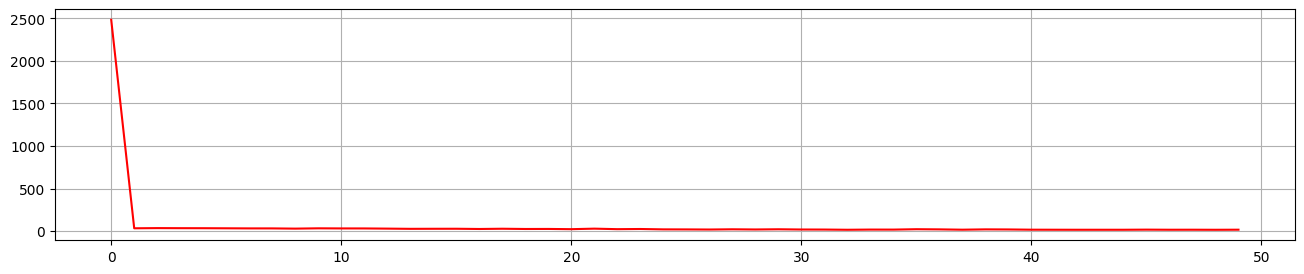

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (16, 3))
plt.grid()
plt.plot( history.history.get('loss') , color = 'red')
plt.show()

In [46]:
# Deep Learning進行預測
# 重要數據
pre_Close = model.predict(X).ravel()
Close = y
sum((pre_Close - Close) ** 2) / len(Close)

14.954849338217702

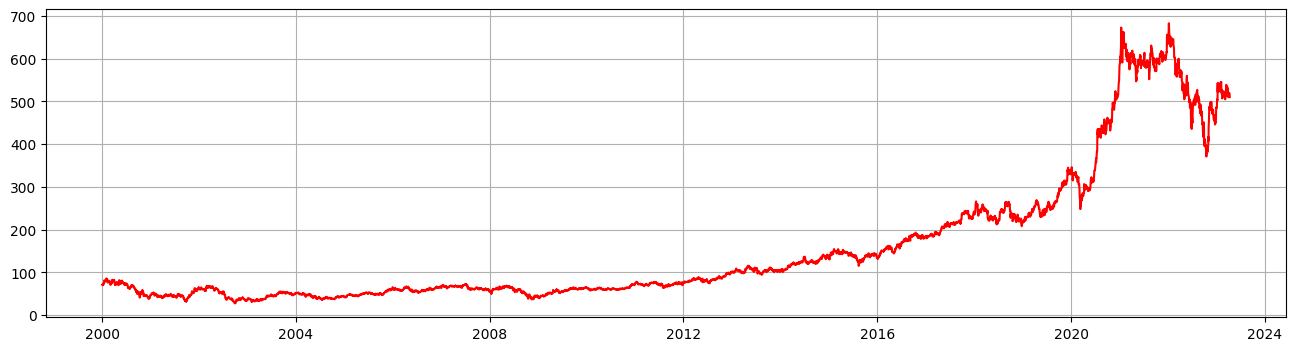

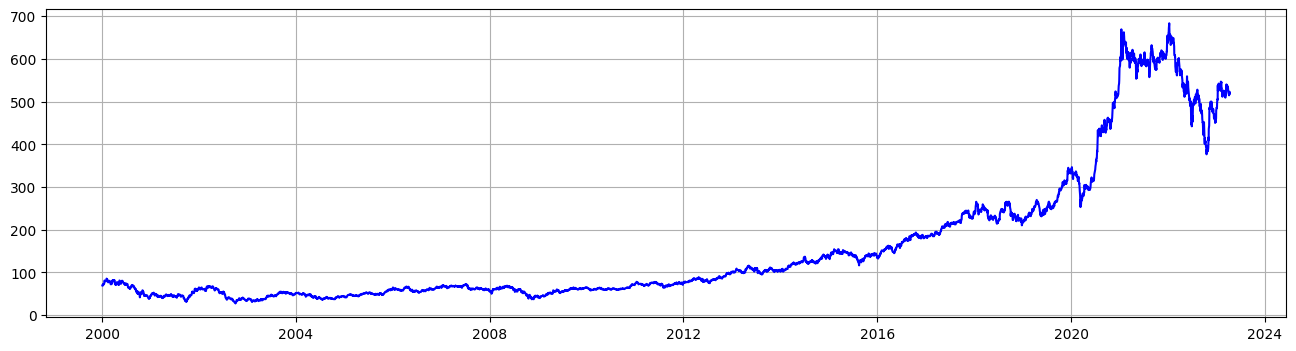

In [47]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

data_plot = data[:len(pre_Close)]

plt.figure(figsize = (16, 4))
plt.grid()
plt.plot(pd.to_datetime(data_plot.Date), Close, color = 'red')
plt.show()

plt.figure(figsize = (16, 4))
plt.grid()
plt.plot(pd.to_datetime(data_plot.Date), pre_Close, color = 'blue')
plt.show()

In [48]:
X.shape
model.predict(X[-1].reshape(1, X[-1].shape[0], X[-1].shape[1]))

array([[518.45984]], dtype=float32)

In [49]:
X[-1]

array([[524.],
       [520.],
       [510.],
       [516.],
       [520.],
       [515.]])

In [50]:
# 針對最近數據預測（Deep Learning）
# 預測下個十天TSMC股價

import numpy as np
from datetime import timedelta

future_days, future_price = [], []

# 下一天
next_data = X[-1]
next_day = model.predict(X[-1].reshape(1, X[-1].shape[0], X[-1].shape[1]))
print(next_day[0], data.Date[-1:].dt.strftime('%Y-%m-%d').values[0])

# 剩下的天數再預測
for i in range(1, 90, 1):
    next_data = np.vstack((next_data , next_day[0]))[-1 * predict_days:, :]
    next_day = model.predict(next_data.reshape(1, next_data.shape[0], next_data.shape[1]))
    print(next_day[0],  (data.Date[-1:] + timedelta(days = i)).dt.strftime('%Y-%m-%d').values[0]  )
    future_days.append((data.Date[-1:] + timedelta(days = i)).dt.strftime('%Y-%m-%d').values[0])
    future_price.append(next_day[0][0])

[518.45984] 2023-04-19
[520.782] 2023-04-20
[522.76733] 2023-04-21
[524.78357] 2023-04-22
[526.99615] 2023-04-23
[528.77606] 2023-04-24
[530.70197] 2023-04-25
[532.639] 2023-04-26
[534.5999] 2023-04-27
[536.56635] 2023-04-28
[538.5577] 2023-04-29
[540.5439] 2023-04-30
[542.53735] 2023-05-01
[544.5362] 2023-05-02
[546.54285] 2023-05-03
[548.5562] 2023-05-04
[550.5779] 2023-05-05
[552.6067] 2023-05-06
[554.64307] 2023-05-07
[556.6868] 2023-05-08
[558.738] 2023-05-09
[560.7964] 2023-05-10
[562.8623] 2023-05-11
[564.936] 2023-05-12
[567.01697] 2023-05-13
[569.1056] 2023-05-14
[571.20184] 2023-05-15
[573.3056] 2023-05-16
[575.417] 2023-05-17
[577.5361] 2023-05-18
[579.6629] 2023-05-19
[581.79736] 2023-05-20
[583.9397] 2023-05-21
[586.0897] 2023-05-22
[588.2477] 2023-05-23
[590.4133] 2023-05-24
[592.58673] 2023-05-25
[594.76807] 2023-05-26
[596.95746] 2023-05-27
[599.1549] 2023-05-28
[601.36017] 2023-05-29
[603.57355] 2023-05-30
[605.7949] 2023-05-31
[608.02435] 2023-06-01
[610.26184] 2023-0

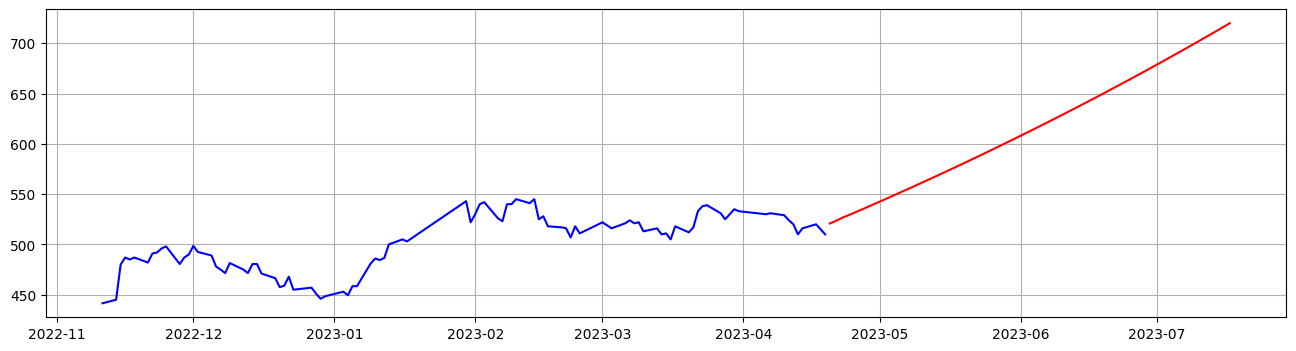

In [51]:
# predict next N days
# draw plot

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize = (16, 4))
plt.grid()
plt.plot(pd.to_datetime(data.Date)[-100:], data.Close[-100:], color = 'blue')

plt.plot(pd.to_datetime(future_days), future_price, color = 'red')

plt.show()

## Time Series Forecasting_Vanilla SimpleRNN

In [52]:
# 驗證函數

from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence) - 1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [53]:
# 驗證

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90


In [54]:
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()
predict_days = 6
df = pdr.get_data_yahoo('2330.tw', start = '1999-01-01', end = '2023-04-20')
data = df.reset_index()
data['TickerId']   = '2330'
data['TickerName'] = '台積電'
data[-9:]

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume,TickerId,TickerName
5800,2023-04-07,535.0,535.0,529.0,531.0,531.0,8557482,2330,台積電
5801,2023-04-10,533.0,533.0,528.0,529.0,529.0,7435151,2330,台積電
5802,2023-04-11,522.0,527.0,522.0,524.0,524.0,22675697,2330,台積電
5803,2023-04-12,523.0,524.0,517.0,520.0,520.0,23816473,2330,台積電
5804,2023-04-13,515.0,517.0,510.0,510.0,510.0,25536889,2330,台積電
5805,2023-04-14,516.0,520.0,513.0,516.0,516.0,18072504,2330,台積電
5806,2023-04-17,519.0,520.0,514.0,520.0,520.0,14634287,2330,台積電
5807,2023-04-18,518.0,520.0,514.0,515.0,515.0,15168888,2330,台積電
5808,2023-04-19,517.0,518.0,509.0,510.0,510.0,21123233,2330,台積電


In [55]:
# 使用TSMC股價驗證

# define input sequence
raw_seq = data.Close # [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 6
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
# for i in range(len(X)):
#   print(X[i], y[i])

In [56]:
X[-4:], y[-4:]

(array([[530., 531., 529., 524., 520., 510.],
        [531., 529., 524., 520., 510., 516.],
        [529., 524., 520., 510., 516., 520.],
        [524., 520., 510., 516., 520., 515.]]),
 array([516., 520., 515., 510.]))

In [57]:
# 使用SimpleRNN看前後記憶

from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, SimpleRNN, GRU, Bidirectional

n_steps = 6
n_features = 1
model = Sequential()
model.add(SimpleRNN(50, activation = 'relu', input_shape = (n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [58]:
# 多出一個維度
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [59]:
X.shape

(5803, 6, 1)

In [60]:
# fit model
history = model.fit(X, y, epochs = 50, verbose = 2)

Epoch 1/50
182/182 - 2s - loss: 1112.7471 - 2s/epoch - 11ms/step
Epoch 2/50
182/182 - 1s - loss: 40.4329 - 744ms/epoch - 4ms/step
Epoch 3/50
182/182 - 1s - loss: 37.5013 - 752ms/epoch - 4ms/step
Epoch 4/50
182/182 - 1s - loss: 40.4631 - 609ms/epoch - 3ms/step
Epoch 5/50
182/182 - 1s - loss: 36.9728 - 675ms/epoch - 4ms/step
Epoch 6/50
182/182 - 1s - loss: 36.7344 - 710ms/epoch - 4ms/step
Epoch 7/50
182/182 - 1s - loss: 35.8846 - 707ms/epoch - 4ms/step
Epoch 8/50
182/182 - 1s - loss: 34.8796 - 669ms/epoch - 4ms/step
Epoch 9/50
182/182 - 1s - loss: 34.9051 - 676ms/epoch - 4ms/step
Epoch 10/50
182/182 - 1s - loss: 33.6967 - 751ms/epoch - 4ms/step
Epoch 11/50
182/182 - 1s - loss: 31.2995 - 797ms/epoch - 4ms/step
Epoch 12/50
182/182 - 1s - loss: 32.8833 - 711ms/epoch - 4ms/step
Epoch 13/50
182/182 - 1s - loss: 32.2945 - 676ms/epoch - 4ms/step
Epoch 14/50
182/182 - 1s - loss: 27.6036 - 685ms/epoch - 4ms/step
Epoch 15/50
182/182 - 1s - loss: 25.7719 - 713ms/epoch - 4ms/step
Epoch 16/50
182/182

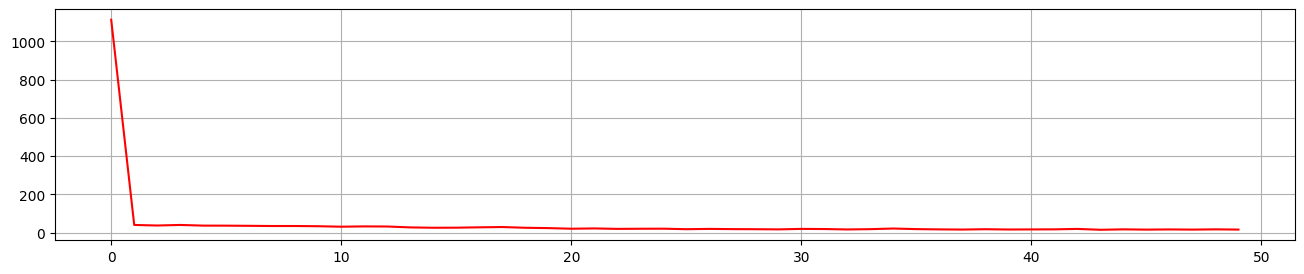

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (16, 3))
plt.grid()
plt.plot(history.history.get('loss') , color = 'red')
plt.show()

In [62]:
# Deep Learning進行預測
# 重要數據
pre_Close = model.predict(X).ravel()
Close = y
sum((pre_Close - Close) ** 2) / len(Close)

14.67496755176223

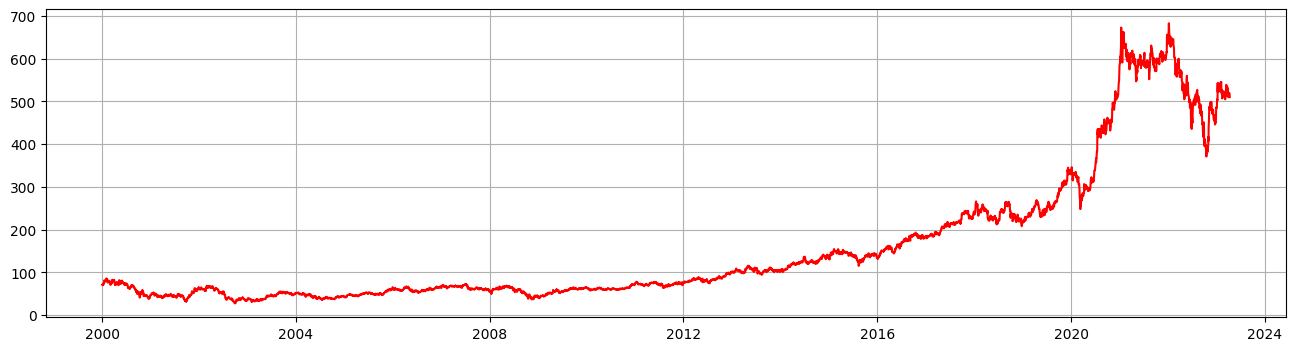

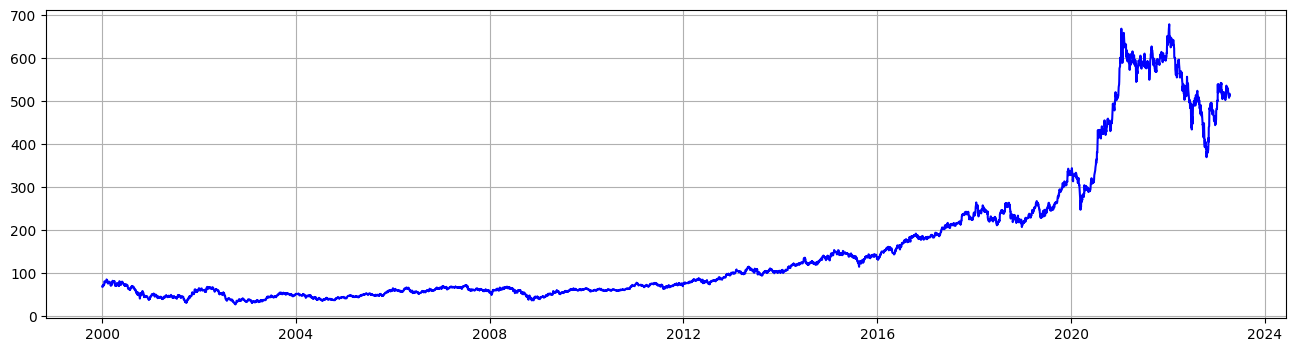

In [63]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

data_plot = data[:len(pre_Close)]

plt.figure(figsize = (16, 4))
plt.grid()
plt.plot(pd.to_datetime(data_plot.Date), Close, color = 'red')
plt.show()

plt.figure(figsize = (16, 4))
plt.grid()
plt.plot(pd.to_datetime(data_plot.Date), pre_Close, color = 'blue')
plt.show()

In [64]:
X.shape
model.predict(X[-1].reshape(1, X[-1].shape[0], X[-1].shape[1]))

array([[512.76337]], dtype=float32)

In [65]:
X[-1]

array([[524.],
       [520.],
       [510.],
       [516.],
       [520.],
       [515.]])

In [66]:
# 針對最近數據預測（Deep Learning）
# 預測下個十天TSMC股價

import numpy as np
from datetime import timedelta

future_days, future_price = [], []

# 下一天
next_data = X[-1]
next_day = model.predict(X[-1].reshape(1, X[-1].shape[0], X[-1].shape[1]))
print(next_day[0], data.Date[-1:].dt.strftime('%Y-%m-%d').values[0])

# 剩下的天數再預測
for i in range(1, 90, 1):
    next_data = np.vstack((next_data , next_day[0]) )[-1 * predict_days:, :]
    next_day = model.predict(next_data.reshape(1, next_data.shape[0], next_data.shape[1]))
    print(next_day[0], (data.Date[-1:] + timedelta(days = i)).dt.strftime('%Y-%m-%d').values[0])
    future_days.append((data.Date[-1:] + timedelta(days = i)).dt.strftime('%Y-%m-%d').values[0])
    future_price.append(next_day[0][0])

[512.76337] 2023-04-19
[510.4327] 2023-04-20
[507.91956] 2023-04-21
[505.63962] 2023-04-22
[503.41516] 2023-04-23
[501.1654] 2023-04-24
[498.93063] 2023-04-25
[496.70416] 2023-04-26
[494.48428] 2023-04-27
[492.275] 2023-04-28
[490.0763] 2023-04-29
[487.88763] 2023-04-30
[485.70908] 2023-05-01
[483.5406] 2023-05-02
[481.382] 2023-05-03
[479.23337] 2023-05-04
[477.09457] 2023-05-05
[474.9656] 2023-05-06
[472.84637] 2023-05-07
[470.7369] 2023-05-08
[468.63718] 2023-05-09
[466.54697] 2023-05-10
[464.46637] 2023-05-11
[462.39532] 2023-05-12
[460.33383] 2023-05-13
[458.28186] 2023-05-14
[456.23932] 2023-05-15
[454.20612] 2023-05-16
[452.18213] 2023-05-17
[450.1675] 2023-05-18
[448.16214] 2023-05-19
[446.166] 2023-05-20
[444.179] 2023-05-21
[442.20108] 2023-05-22
[440.2323] 2023-05-23
[438.27258] 2023-05-24
[436.32187] 2023-05-25
[434.38004] 2023-05-26
[432.44714] 2023-05-27
[430.52307] 2023-05-28
[428.60782] 2023-05-29
[426.70142] 2023-05-30
[424.80374] 2023-05-31
[422.91483] 2023-06-01
[421

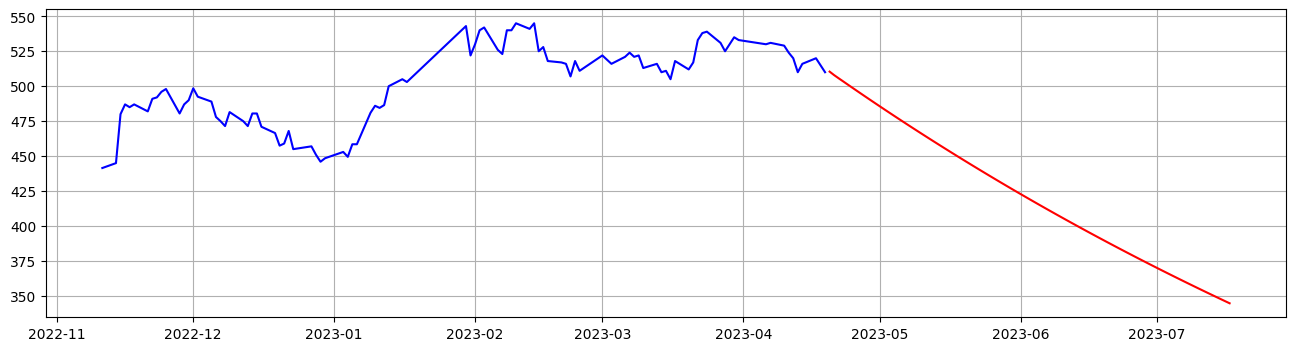

In [67]:
# predict next N days
# draw plot

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize = (16, 4))
plt.grid()
plt.plot(pd.to_datetime(data.Date)[-100:], data.Close[-100:], color = 'blue')

plt.plot(pd.to_datetime(future_days), future_price, color = 'red')

plt.show()

## Time Series Forecasting_Bidirectional GRU

In [68]:
# 驗證函數

from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence) - 1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [69]:
# 驗證

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90


In [70]:
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()
predict_days = 6
df = pdr.get_data_yahoo('2330.tw', start = '1999-01-01', end = '2023-04-20')
data = df.reset_index()
data['TickerId']   = '2330'
data['TickerName'] = '台積電'
data[-9:]

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume,TickerId,TickerName
5800,2023-04-07,535.0,535.0,529.0,531.0,531.0,8557482,2330,台積電
5801,2023-04-10,533.0,533.0,528.0,529.0,529.0,7435151,2330,台積電
5802,2023-04-11,522.0,527.0,522.0,524.0,524.0,22675697,2330,台積電
5803,2023-04-12,523.0,524.0,517.0,520.0,520.0,23816473,2330,台積電
5804,2023-04-13,515.0,517.0,510.0,510.0,510.0,25536889,2330,台積電
5805,2023-04-14,516.0,520.0,513.0,516.0,516.0,18072504,2330,台積電
5806,2023-04-17,519.0,520.0,514.0,520.0,520.0,14634287,2330,台積電
5807,2023-04-18,518.0,520.0,514.0,515.0,515.0,15168888,2330,台積電
5808,2023-04-19,517.0,518.0,509.0,510.0,510.0,21123233,2330,台積電


In [71]:
# 使用台積電股價驗證

# define input sequence
raw_seq = data.Close # [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 6
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
# for i in range(len(X)):
#   print(X[i], y[i])

In [72]:
X[-4:], y[-4:]

(array([[530., 531., 529., 524., 520., 510.],
        [531., 529., 524., 520., 510., 516.],
        [529., 524., 520., 510., 516., 520.],
        [524., 520., 510., 516., 520., 515.]]),
 array([516., 520., 515., 510.]))

In [73]:
# 使用LSTM看前後記憶

from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, GRU, Bidirectional

n_steps = 6
n_features = 1
model = Sequential()
model.add(Bidirectional(GRU(50, activation = 'relu', input_shape = (n_steps, n_features))))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')
# model.summary()

In [74]:
# 多出一個維度
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [75]:
X.shape

(5803, 6, 1)

In [76]:
# fit model
history = model.fit(X, y, epochs = 50, verbose = 2)

Epoch 1/50
182/182 - 3s - loss: 8743.2588 - 3s/epoch - 17ms/step
Epoch 2/50
182/182 - 1s - loss: 36.2141 - 921ms/epoch - 5ms/step
Epoch 3/50
182/182 - 1s - loss: 35.9668 - 828ms/epoch - 5ms/step
Epoch 4/50
182/182 - 1s - loss: 31.3523 - 883ms/epoch - 5ms/step
Epoch 5/50
182/182 - 1s - loss: 30.4641 - 811ms/epoch - 4ms/step
Epoch 6/50
182/182 - 1s - loss: 29.2114 - 941ms/epoch - 5ms/step
Epoch 7/50
182/182 - 1s - loss: 27.7219 - 874ms/epoch - 5ms/step
Epoch 8/50
182/182 - 1s - loss: 25.2284 - 820ms/epoch - 5ms/step
Epoch 9/50
182/182 - 1s - loss: 25.2154 - 824ms/epoch - 5ms/step
Epoch 10/50
182/182 - 1s - loss: 24.7512 - 961ms/epoch - 5ms/step
Epoch 11/50
182/182 - 1s - loss: 22.6469 - 941ms/epoch - 5ms/step
Epoch 12/50
182/182 - 1s - loss: 20.6618 - 969ms/epoch - 5ms/step
Epoch 13/50
182/182 - 1s - loss: 20.4916 - 884ms/epoch - 5ms/step
Epoch 14/50
182/182 - 1s - loss: 20.4161 - 950ms/epoch - 5ms/step
Epoch 15/50
182/182 - 1s - loss: 21.2450 - 932ms/epoch - 5ms/step
Epoch 16/50
182/182

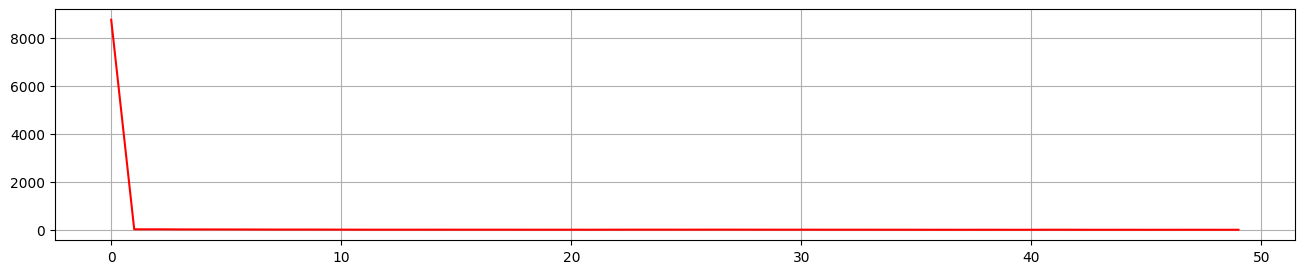

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (16, 3))
plt.grid()
plt.plot( history.history.get('loss') , color = 'red')
plt.show()

In [78]:
# Deep Learning進行預測
# 重要數據
pre_Close = model.predict(X).ravel()
Close = y
sum((pre_Close - Close) ** 2) / len(Close)

14.426787158684172

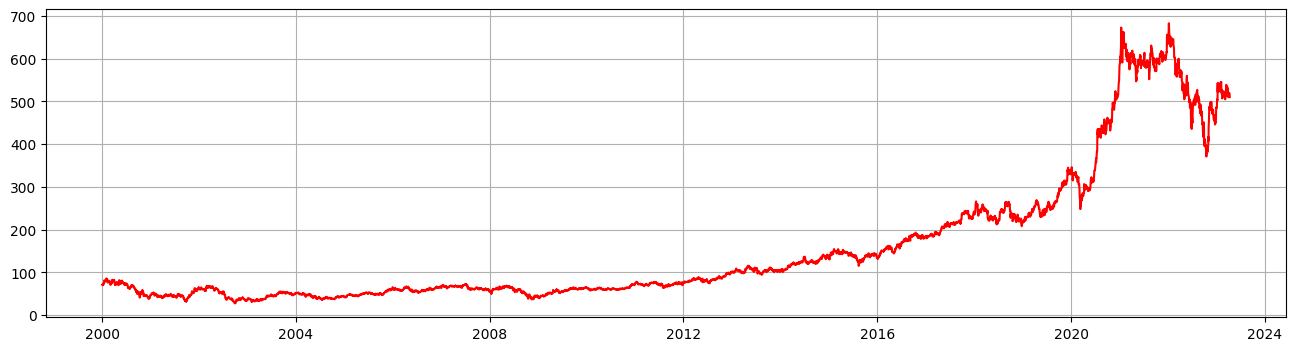

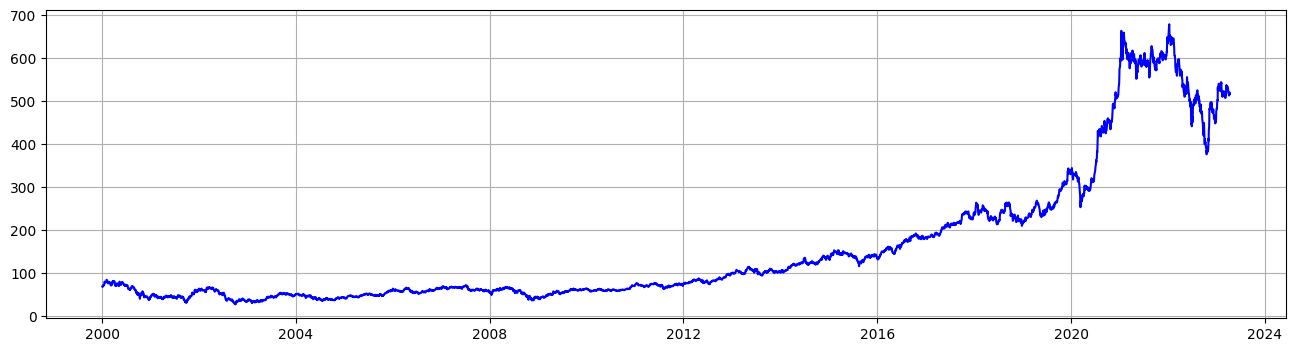

In [79]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

data_plot = data[:len(pre_Close)]

plt.figure(figsize = (16, 4))
plt.grid()
plt.plot(pd.to_datetime(data_plot.Date), Close, color = 'red')
plt.show()

plt.figure(figsize = (16, 4))
plt.grid()
plt.plot(pd.to_datetime(data_plot.Date), pre_Close, color = 'blue')
plt.show()

In [80]:
X.shape
model.predict(X[-1].reshape(1, X[-1].shape[0], X[-1].shape[1]))

array([[517.2222]], dtype=float32)

In [81]:
X[-1]

array([[524.],
       [520.],
       [510.],
       [516.],
       [520.],
       [515.]])

In [82]:
# 針對最近數據預測 Deep Learning
# 預測下個十天TSMC股價

import numpy as np
from datetime import timedelta

future_days, future_price = [], []

# 下一天
next_data = X[-1]
next_day = model.predict(X[-1].reshape(1, X[-1].shape[0], X[-1].shape[1]))
print(next_day[0], data.Date[-1:].dt.strftime("%Y-%m-%d").values[0])

# 剩下的天數 再預測
for i in range(1, 90, 1):
    next_data = np.vstack( (next_data , next_day[0]) )[-1 * predict_days:, :]
    next_day = model.predict(next_data.reshape(1, next_data.shape[0], next_data.shape[1]))
    print(next_day[0],  (data.Date[-1:] + timedelta(days = i)).dt.strftime("%Y-%m-%d").values[0])
    future_days.append((data.Date[-1:] + timedelta(days = i)).dt.strftime("%Y-%m-%d").values[0])
    future_price.append(next_day[0][0])

# 預測下個十天TSMC股價
# import numpy as np

# future_days, future_price = [], []

# 數據最後一天數據使用model去預測
# next_data = X[-1]
# next_day = model.predict(X[-1].reshape(1, X[-1].shape[0], X[-1].shape[1]))
# print(next_day[0], data.Date[-1:].dt.strftime("%Y-%m-%d").values[0])

# 再預測下N天
# for i in range(1, 90, 1):
#     next_data = np.vstack((next_data , next_day[0]))[-1*predict_days:, :]
#     next_day = model.predict(next_data.reshape(1, next_data.shape[0], next_data.shape[1]))
#     future_days.append((data.Date[-1:] + timedelta(days=i)).dt.strftime("%Y-%m-%d").values[0])
#     future_price.append(next_day[0][0])
#     #print(next_day[0], (data.Date[-1:] + timedelta(days=i)).dt.strftime("%Y-%m-%d").values[0])

[517.2222] 2023-04-19
[517.29224] 2023-04-20
[517.6015] 2023-04-21
[518.2448] 2023-04-22
[518.80743] 2023-04-23
[519.1792] 2023-04-24
[519.65875] 2023-04-25
[520.088] 2023-04-26
[520.5282] 2023-04-27
[520.97906] 2023-04-28
[521.43066] 2023-04-29
[521.87897] 2023-04-30
[522.3283] 2023-05-01
[522.7755] 2023-05-02
[523.2222] 2023-05-03
[523.66864] 2023-05-04
[524.1149] 2023-05-05
[524.5608] 2023-05-06
[525.00635] 2023-05-07
[525.4514] 2023-05-08
[525.89624] 2023-05-09
[526.3406] 2023-05-10
[526.7845] 2023-05-11
[527.22797] 2023-05-12
[527.6711] 2023-05-13
[528.1138] 2023-05-14
[528.5561] 2023-05-15
[528.99805] 2023-05-16
[529.4396] 2023-05-17
[529.88074] 2023-05-18
[530.32153] 2023-05-19
[530.7619] 2023-05-20
[531.20184] 2023-05-21
[531.6414] 2023-05-22
[532.0807] 2023-05-23
[532.51953] 2023-05-24
[532.95795] 2023-05-25
[533.396] 2023-05-26
[533.8336] 2023-05-27
[534.2709] 2023-05-28
[534.7077] 2023-05-29
[535.1441] 2023-05-30
[535.5802] 2023-05-31
[536.0158] 2023-06-01
[536.4511] 2023-06

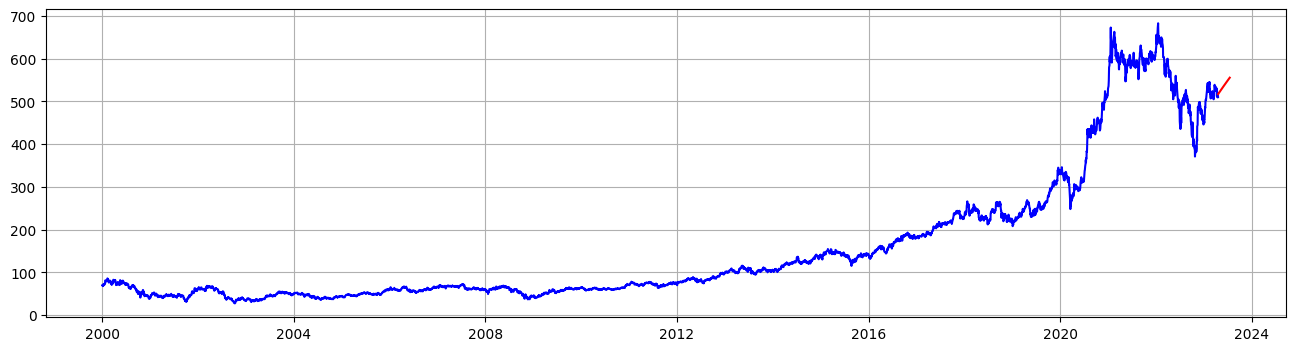

In [83]:
# predict next N days
# draw plot

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize = (16, 4))
plt.grid()
plt.plot(pd.to_datetime(data.Date)[:], data.Close[:], color = 'blue')

plt.plot(pd.to_datetime(future_days), future_price, color = 'red')

plt.show()

## Time Series Forecasting_GRU

In [84]:
# 驗證函數

from numpy import array
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence) - 1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [85]:
# 驗證

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90


In [86]:
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()
predict_days = 6
df = pdr.get_data_yahoo('2330.tw', start = '1999-01-01', end = '2023-04-20')
data = df.reset_index()
data['TickerId']   = '2330'
data['TickerName'] = '台積電'
data[-9:]

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume,TickerId,TickerName
5800,2023-04-07,535.0,535.0,529.0,531.0,531.0,8557482,2330,台積電
5801,2023-04-10,533.0,533.0,528.0,529.0,529.0,7435151,2330,台積電
5802,2023-04-11,522.0,527.0,522.0,524.0,524.0,22675697,2330,台積電
5803,2023-04-12,523.0,524.0,517.0,520.0,520.0,23816473,2330,台積電
5804,2023-04-13,515.0,517.0,510.0,510.0,510.0,25536889,2330,台積電
5805,2023-04-14,516.0,520.0,513.0,516.0,516.0,18072504,2330,台積電
5806,2023-04-17,519.0,520.0,514.0,520.0,520.0,14634287,2330,台積電
5807,2023-04-18,518.0,520.0,514.0,515.0,515.0,15168888,2330,台積電
5808,2023-04-19,517.0,518.0,509.0,510.0,510.0,21123233,2330,台積電


In [87]:
# 使用TSMC股價驗證

# define input sequence
raw_seq = data.Close # [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 6
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
# for i in range(len(X)):
#   print(X[i], y[i])

In [88]:
X[-4:], y[-4:]

(array([[530., 531., 529., 524., 520., 510.],
        [531., 529., 524., 520., 510., 516.],
        [529., 524., 520., 510., 516., 520.],
        [524., 520., 510., 516., 520., 515.]]),
 array([516., 520., 515., 510.]))

In [89]:
# 使用LSTM看前後記憶

from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, GRU

n_steps = 6
n_features = 1
model = Sequential()
model.add(GRU(50, activation = 'relu', input_shape = (n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 50)                7950      
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 8,001
Trainable params: 8,001
Non-trainable params: 0
_________________________________________________________________


In [90]:
# 多出一個維度
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [91]:
X.shape

(5803, 6, 1)

In [92]:
# fit model
history = model.fit(X, y, epochs = 50, verbose = 2)

Epoch 1/50
182/182 - 2s - loss: 2807.5723 - 2s/epoch - 12ms/step
Epoch 2/50
182/182 - 1s - loss: 21.6011 - 995ms/epoch - 5ms/step
Epoch 3/50
182/182 - 1s - loss: 20.7815 - 984ms/epoch - 5ms/step
Epoch 4/50
182/182 - 1s - loss: 22.1435 - 1s/epoch - 6ms/step
Epoch 5/50
182/182 - 1s - loss: 20.3876 - 965ms/epoch - 5ms/step
Epoch 6/50
182/182 - 1s - loss: 20.5457 - 990ms/epoch - 5ms/step
Epoch 7/50
182/182 - 1s - loss: 18.6277 - 886ms/epoch - 5ms/step
Epoch 8/50
182/182 - 1s - loss: 18.0410 - 993ms/epoch - 5ms/step
Epoch 9/50
182/182 - 1s - loss: 18.4648 - 1s/epoch - 6ms/step
Epoch 10/50
182/182 - 1s - loss: 18.7278 - 975ms/epoch - 5ms/step
Epoch 11/50
182/182 - 1s - loss: 19.4768 - 924ms/epoch - 5ms/step
Epoch 12/50
182/182 - 1s - loss: 20.2466 - 1s/epoch - 6ms/step
Epoch 13/50
182/182 - 1s - loss: 18.7538 - 1s/epoch - 6ms/step
Epoch 14/50
182/182 - 1s - loss: 21.1393 - 925ms/epoch - 5ms/step
Epoch 15/50
182/182 - 1s - loss: 18.9810 - 1s/epoch - 6ms/step
Epoch 16/50
182/182 - 1s - loss: 1

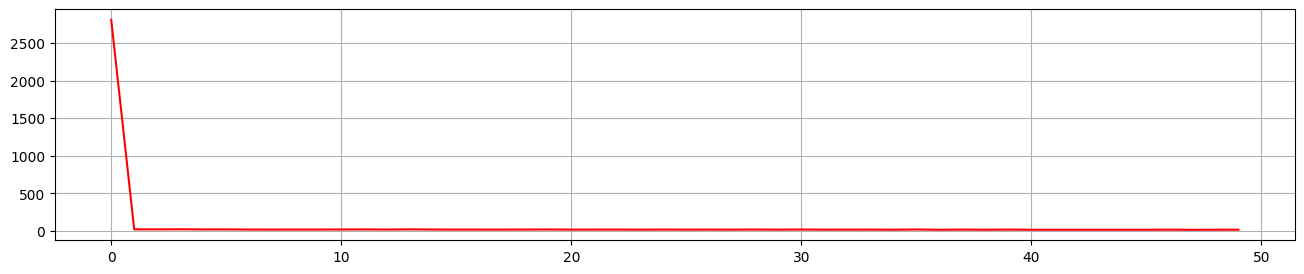

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (16, 3))
plt.grid()
plt.plot( history.history.get('loss') , color = 'red')
plt.show()

In [94]:
# Deep Learning進行預測
# 重要數據
pre_Close = model.predict(X).ravel()
Close = y
sum((pre_Close - Close) ** 2) / len(Close)

14.054284013697272

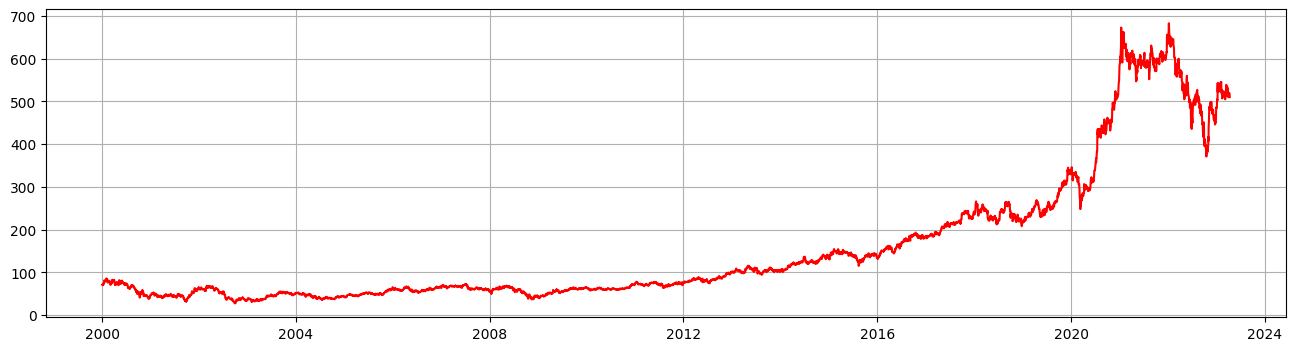

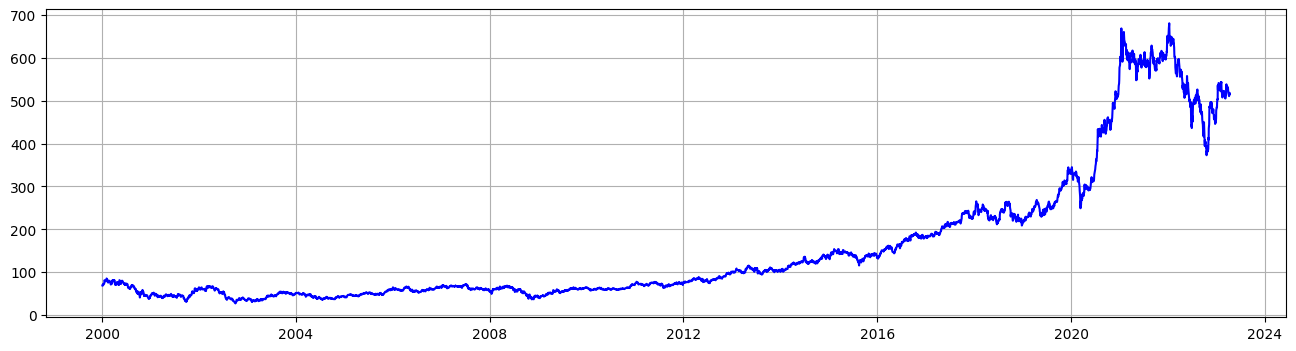

In [95]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

data_plot = data[:len(pre_Close)]

plt.figure(figsize = (16, 4))
plt.grid()
plt.plot(pd.to_datetime(data_plot.Date), Close, color = 'red')
plt.show()

plt.figure(figsize = (16, 4))
plt.grid()
plt.plot(pd.to_datetime(data_plot.Date), pre_Close, color = 'blue')
plt.show()

In [96]:
X.shape
model.predict(X[-1].reshape(1, X[-1].shape[0], X[-1].shape[1]))

array([[515.0129]], dtype=float32)

In [97]:
X[-1]

array([[524.],
       [520.],
       [510.],
       [516.],
       [520.],
       [515.]])

In [98]:
# 針對最近數據預測（Deep Learning）
# 預測下個十天TSMC股價

import numpy as np
from datetime import timedelta

future_days, future_price = [], []

# 下一天
next_data = X[-1]
next_day = model.predict(X[-1].reshape(1, X[-1].shape[0], X[-1].shape[1]))
print(next_day[0], data.Date[-1:].dt.strftime('%Y-%m-%d').values[0])

# 剩下的天數再預測
for i in range(1, 90, 1):
    next_data = np.vstack( (next_data , next_day[0]) )[-1 * predict_days:, :]
    next_day = model.predict(next_data.reshape(1, next_data.shape[0], next_data.shape[1]))
    print(next_day[0], (data.Date[-1:] + timedelta(days = i)).dt.strftime('%Y-%m-%d').values[0])
    future_days.append((data.Date[-1:] + timedelta(days = i)).dt.strftime('%Y-%m-%d').values[0])
    future_price.append(next_day[0][0])

[515.0129] 2023-04-19
[514.0479] 2023-04-20
[513.41614] 2023-04-21
[512.64087] 2023-04-22
[511.86237] 2023-04-23
[511.12018] 2023-04-24
[510.3666] 2023-04-25
[509.6188] 2023-04-26
[508.87024] 2023-04-27
[508.12372] 2023-04-28
[507.37857] 2023-04-29
[506.63464] 2023-04-30
[505.89203] 2023-05-01
[505.1507] 2023-05-02
[504.41064] 2023-05-03
[503.6719] 2023-05-04
[502.93442] 2023-05-05
[502.1983] 2023-05-06
[501.4635] 2023-05-07
[500.72992] 2023-05-08
[499.9977] 2023-05-09
[499.26672] 2023-05-10
[498.53702] 2023-05-11
[497.80856] 2023-05-12
[497.0814] 2023-05-13
[496.3556] 2023-05-14
[495.63098] 2023-05-15
[494.9077] 2023-05-16
[494.1856] 2023-05-17
[493.46475] 2023-05-18
[492.7453] 2023-05-19
[492.02704] 2023-05-20
[491.31006] 2023-05-21
[490.5943] 2023-05-22
[489.87985] 2023-05-23
[489.1666] 2023-05-24
[488.45468] 2023-05-25
[487.74396] 2023-05-26
[487.03445] 2023-05-27
[486.32623] 2023-05-28
[485.61926] 2023-05-29
[484.9135] 2023-05-30
[484.20905] 2023-05-31
[483.50574] 2023-06-01
[482.

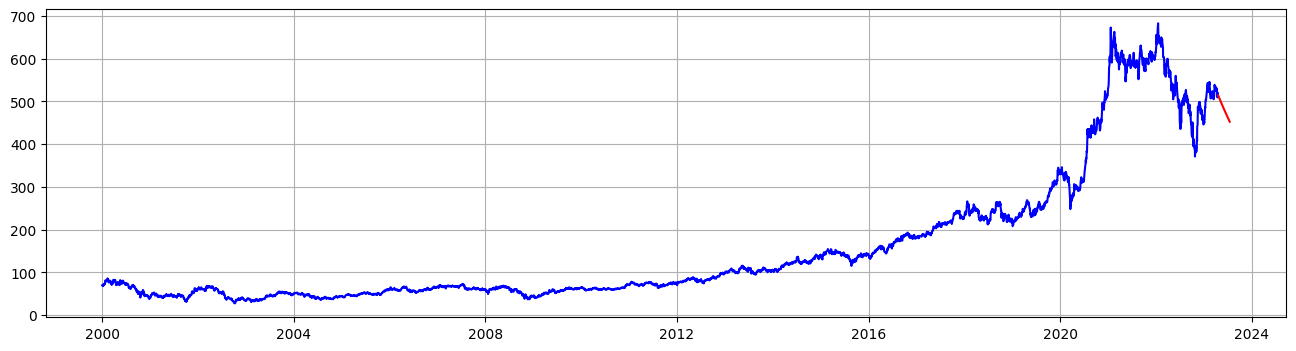

In [99]:
# predict next N days
# draw plot

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize = (16, 4))
plt.grid()
plt.plot(pd.to_datetime(data.Date)[:], data.Close[:], color = 'blue')

plt.plot(pd.to_datetime(future_days), future_price, color = 'red')

plt.show()